In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os

In [16]:
# get image files from directory
def getImageFiles(path):
    imagePaths = []
    for file in os.listdir(path):
        imagePaths.append(os.path.join(path,file))
    return imagePaths

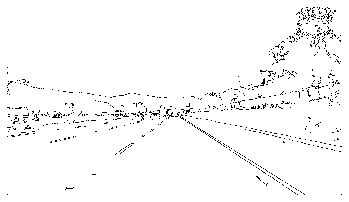

In [48]:
dirPaths = "/home/vidhikatkoria/VR/road_lane_images"
imagePaths = []
imagePaths = getImageFiles(dirPaths)
edges_list = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
# img = cv2.imread("/home/vidhikatkoria/VR/road_lane_images/test1.jpg")
# fig=plt.figure()
# ax=fig.add_subplot(1,1,1)
    plt.axis('off')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    edges_list.append(edges)
    plt.imshow(edges, cmap = "binary")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.savefig(dirPaths+"/edges"+str(i)+".jpg", bbox_inches="tight")

In [61]:
def get_aoi(img):
    rows, cols = img.shape[:2]
    mask = np.zeros_like(img)
    
    left_bottom = [cols * 0.1, rows]
    right_bottom = [cols * 0.95, rows]
    left_top = [cols * 0.4, rows * 0.6]
    right_top = [cols * 0.6, rows * 0.6]
    
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    
    if len(mask.shape) == 2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255, ) * mask.shape[2])
    return cv2.bitwise_and(img, mask)

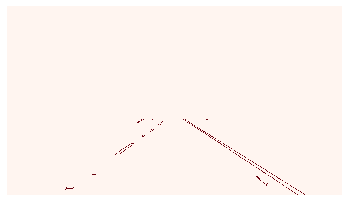

In [49]:
# get area of interest edges for set of images and save the masked edges
lane_marks = []
i=0
for edges in edges_list:        
    lane = get_aoi(edges)
    lane_marks.append(lane)
    plt.axis('off')
    plt.imshow(lane, cmap = "Reds")
    i+=1
    plt.savefig(dirPaths+"/edge_aoi"+str(i)+".jpg", bbox_inches="tight")

In [28]:
def get_hough_lines(img, rho=1, theta=np.pi/180, threshold=20, min_line_len=20, max_line_gap=300):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines

In [29]:
#This function draws `lines` with `color` and `thickness`.    
#Lines are drawn on the image inplace (mutates the image).
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
    return img

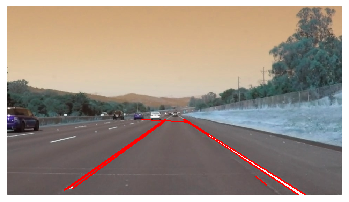

In [60]:
# get hough line and draw lines on image
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    hough_lines_imgs = []
    lines = []
    # for img in aoi_imgs:
    # lines.append(get_hough_lines(lane_marks))
    line = get_hough_lines(lane_marks[i])    
    hough_lines_img = draw_lines(image, line)

    plt.imshow(hough_lines_img)
    plt.axis('off')
    plt.savefig(dirPaths+"/laneDetected"+str(i)+".jpg", bbox_inches="tight")